# BitCoin Price Prediction

## Motivation

Already two years since the Covid pandemic appeared in our lifes changing not only labour relations but also our approach towards money itself. What is the role of bitcoin in this new reality that seems to be the new norm. Will it continue its upward trend or not? This hypothesis is tested against the two major currencies in the market, namely the US Dollar and the Euro.


## What is Bitcoin and how does it work?

Bitcoin is a digital currency which operates free of any central control or the oversight of banks or governments. Instead it relies on peer-to-peer software and cryptography.

A public ledger records all bitcoin transactions and copies are held on servers around the world. Anyone with a spare computer can set up one of these servers, known as a node. Consensus on who owns which coins is reached cryptographically across these nodes rather than relying on a central source of trust like a bank.

Every transaction is publicly broadcast to the network and shared from node to node. Every ten minutes or so these transactions are collected together by miners into a group called a block and added permanently to the blockchain. This is the definitive account book of bitcoin.

In much the same way you would keep traditional coins in a physical wallet, virtual currencies are held in digital wallets and can be accessed from client software or a range of online and hardware tools.

Bitcoins can currently be subdivided by seven decimal places: a thousandth of a bitcoin is known as a milli and a hundred millionth of a bitcoin is known as a satoshi.

In truth there is no such thing as a bitcoin or a wallet, just agreement among the network about ownership of a coin. A private key is used to prove ownership of funds to the network when making a transaction. A person could simply memorise their private key and need nothing else to retrieve or spend their virtual cash, a concept which is known as a “brain wallet”.

Read more: [here](https://www.newscientist.com/definition/bitcoin/#ixzz7Ayd8Nbuj "Follow Link")

In [ ]:
pip install pandas-datareader

In [1]:
# import libraries
import pandas as pd
import numpy as np
import statsmodels.api as smt
from matplotlib import pyplot as plt
from datetime import datetime as dt
import pandas_datareader as pdr

## Scraping Yahoo Finance for Bitcoin Data

The Bitcoin historical data were scraped from Yahoo [Here](https://www.investing.com/currencies/us-dollar-index-historical-data 'Follow Link')

In [ ]:
# specifying the ticker
ticker = 'BTC-USD'

In [ ]:
# time frame 
start = dt.datetime(2014, 9, 16)
end = dt.datetime(2021, 10, 14)

In [ ]:
# getting the data from yahoo
df = pdr.get_data_yahoo(ticker, start, end)
df

In [ ]:
df.to_csv('BTC_USD.csv')

## Data preprocessing

- We want to make sure that we are using enough historical data to make the model more accurate. We are using historical data for bitcoin, usd and euro prices from Sep 2014 to Oct 2021.

In [2]:
df = pd.read_csv('BTC_USD.csv')
df

Date          High           Low          Open         Close  \
0     2014-09-16    468.174011    452.421997    465.864014    457.334015   
1     2014-09-17    456.859985    413.104004    456.859985    424.440002   
2     2014-09-18    427.834991    384.532013    424.102997    394.795990   
3     2014-09-19    423.295990    389.882996    394.673004    408.903992   
4     2014-09-20    412.425995    393.181000    408.084991    398.821014   
...          ...           ...           ...           ...           ...   
2576  2021-10-09  56401.304688  54264.257812  54952.820312  54771.578125   
2577  2021-10-10  57793.039062  54519.765625  54734.125000  57484.789062   
2578  2021-10-11  57627.878906  54477.972656  57526.832031  56041.058594   
2579  2021-10-12  57688.660156  54370.972656  56038.257812  57401.097656   
2580  2021-10-14  58382.339844  56968.035156  57491.265625  57593.593750   

            Volume     Adj Close  
0     2.105680e+07    457.334015  
1     3.448320e+07    424.440002  
2     3.791970e+07    394.795990  
3     3.686360e+07    408.903992  
4     2.658010e+07    398.821014  
...            ...           ...  
2576  3.952779e+10  54771.578125  
2577  4.263733e+10  57484.789062  
2578  4.108376e+10  56041.058594  
2579  4.168425e+10  57401.097656  
2580  3.866082e+10  57593.593750  

[2581 rows x 7 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2581 entries, 0 to 2580
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2581 non-null   object 
 1   High       2581 non-null   float64
 2   Low        2581 non-null   float64
 3   Open       2581 non-null   float64
 4   Close      2581 non-null   float64
 5   Volume     2581 non-null   float64
 6   Adj Close  2581 non-null   float64
dtypes: float64(6), object(1)
memory usage: 141.3+ KB


In [4]:
df = df.drop(columns=['High', 'Low', 'Open', 'Adj Close'])

In [5]:
df

Date         Close        Volume
0     2014-09-16    457.334015  2.105680e+07
1     2014-09-17    424.440002  3.448320e+07
2     2014-09-18    394.795990  3.791970e+07
3     2014-09-19    408.903992  3.686360e+07
4     2014-09-20    398.821014  2.658010e+07
...          ...           ...           ...
2576  2021-10-09  54771.578125  3.952779e+10
2577  2021-10-10  57484.789062  4.263733e+10
2578  2021-10-11  56041.058594  4.108376e+10
2579  2021-10-12  57401.097656  4.168425e+10
2580  2021-10-14  57593.593750  3.866082e+10

[2581 rows x 3 columns]

In [6]:
# convert date to datetime stamp
df.Date=pd.to_datetime(df.Date, errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2581 entries, 0 to 2580
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2581 non-null   datetime64[ns]
 1   Close   2581 non-null   float64       
 2   Volume  2581 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 60.6 KB


In [8]:
# check missing values
df['Date'].isna().sum()

0

In [9]:
# dropping subset
df=df.dropna(subset=['Date'], axis=0)

In [10]:
# set date as index
df= df.set_index('Date')

In [11]:
df

Close        Volume
Date                                  
2014-09-16    457.334015  2.105680e+07
2014-09-17    424.440002  3.448320e+07
2014-09-18    394.795990  3.791970e+07
2014-09-19    408.903992  3.686360e+07
2014-09-20    398.821014  2.658010e+07
...                  ...           ...
2021-10-09  54771.578125  3.952779e+10
2021-10-10  57484.789062  4.263733e+10
2021-10-11  56041.058594  4.108376e+10
2021-10-12  57401.097656  4.168425e+10
2021-10-14  57593.593750  3.866082e+10

[2581 rows x 2 columns]

## Load USD Prices

The US Dollar Index Futures Historical Data were taken from Investing [Here](https://www.investing.com/currencies/us-dollar-index-historical-data "Follow Link")

In [12]:
usd = pd.read_csv("USD.csv", index_col=0, parse_dates=True)
usd

Price    Open    High     Low    Vol. Change %
Date                                                       
2021-10-14  93.987  94.018  94.093  93.757       -   -0.03%
2021-10-13  94.013  94.532  94.543  94.010       -   -0.54%
2021-10-12  94.519  94.395  94.570  94.235  17.52K    0.20%
2021-10-11  94.326  94.105  94.415  94.030  19.69K    0.26%
2021-10-08  94.079  94.195  94.345  93.925  32.27K   -0.15%
...            ...     ...     ...     ...     ...      ...
2014-09-22  84.863  84.930  84.975  84.645  18.20K   -0.00%
2014-09-19  84.865  84.370  84.935  84.335  37.09K    0.52%
2014-09-18  84.430  84.865  84.900  84.340  32.28K   -0.07%
2014-09-17  84.486  84.235  84.860  84.075  66.61K    0.30%
2014-09-16  84.231  84.375  84.495  84.005  35.28K   -0.02%

[1829 rows x 6 columns]

In [13]:
usd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1829 entries, 2021-10-14 to 2014-09-16
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     1829 non-null   float64
 1   Open      1829 non-null   float64
 2   High      1829 non-null   float64
 3   Low       1829 non-null   float64
 4   Vol.      1829 non-null   object 
 5   Change %  1829 non-null   object 
dtypes: float64(4), object(2)
memory usage: 100.0+ KB


In [14]:
usd = usd.drop(columns=['High', 'Low', 'Open', 'Vol.', 'Change %'])

In [15]:
usd

Price
Date              
2021-10-14  93.987
2021-10-13  94.013
2021-10-12  94.519
2021-10-11  94.326
2021-10-08  94.079
...            ...
2014-09-22  84.863
2014-09-19  84.865
2014-09-18  84.430
2014-09-17  84.486
2014-09-16  84.231

[1829 rows x 1 columns]

In [16]:
usd.rename({'Price': 'USD'}, axis=1, inplace=True)

In [17]:
usd

USD
Date              
2021-10-14  93.987
2021-10-13  94.013
2021-10-12  94.519
2021-10-11  94.326
2021-10-08  94.079
...            ...
2014-09-22  84.863
2014-09-19  84.865
2014-09-18  84.430
2014-09-17  84.486
2014-09-16  84.231

[1829 rows x 1 columns]

## Load Euro Data

The Euro Index Futures Historical Data were taken from Investing [Here](https://www.investing.com/indices/investing.com-eur-index-historical-data "Follow Link")

In [18]:
euro = pd.read_csv("Euro.csv", index_col=0, parse_dates=True)
euro

Price    Open    High     Low Vol. Change %
Date                                                    
2021-10-14  110.94  110.58  111.08  110.58    -    0.32%
2021-10-13  110.58  110.67  111.04  110.53    -   -0.08%
2021-10-12  110.67  110.62  110.83  110.50    -    0.05%
2021-10-11  110.62  110.57  110.82  110.56    -    0.04%
2021-10-10  110.57  110.47  110.70  110.47    -    0.02%
...            ...     ...     ...     ...  ...      ...
2014-09-21   97.62   97.59   97.68   97.51    -    0.05%
2014-09-19   97.57   98.02   98.20   97.38    -   -0.48%
2014-09-18   98.04   97.83   98.27   97.45    -    0.20%
2014-09-17   97.84   98.27   98.53   97.62    -   -0.45%
2014-09-16   98.29   98.16   98.56   98.02    -    0.10%

[2235 rows x 6 columns]

In [19]:
euro.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2235 entries, 2021-10-14 to 2014-09-16
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2235 non-null   float64
 1   Open      2235 non-null   float64
 2   High      2235 non-null   float64
 3   Low       2235 non-null   float64
 4   Vol.      2235 non-null   object 
 5   Change %  2235 non-null   object 
dtypes: float64(4), object(2)
memory usage: 122.2+ KB


In [20]:
euro = euro.drop(columns=['High', 'Low', 'Open', 'Vol.', 'Change %'])
euro

Price
Date              
2021-10-14  110.94
2021-10-13  110.58
2021-10-12  110.67
2021-10-11  110.62
2021-10-10  110.57
...            ...
2014-09-21   97.62
2014-09-19   97.57
2014-09-18   98.04
2014-09-17   97.84
2014-09-16   98.29

[2235 rows x 1 columns]

In [21]:
euro.rename({'Price': 'EURO'}, axis=1, inplace=True)

In [22]:
euro.describe()

EURO
count  2235.000000
mean     95.269306
std       7.026199
min      84.310000
25%      89.330000
50%      94.470000
75%      97.225000
max     112.120000

In [23]:
usd.describe()

USD
count  1829.000000
mean     95.176718
std       3.412956
min      84.231000
25%      92.969000
50%      95.509000
75%      97.430000
max     103.605000

In [24]:
df.describe()

Close        Volume
count   2581.000000  2.581000e+03
mean    9382.642702  1.370861e+10
std    13741.138076  1.988197e+10
min      178.102997  5.914570e+06
25%      577.469971  7.396970e+07
50%     5464.866699  4.543860e+09
75%     9690.142578  2.214970e+10
max    63503.457031  3.509679e+11

In [25]:
print(df.shape)
print(usd.shape)
print(euro.shape)

(2581, 2)
(1829, 1)
(2235, 1)


## Merge datasets

In [26]:
from functools import reduce
dfs = [df, usd, euro]

In [27]:
final = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs)
final

Close        Volume     USD    EURO
Date                                                  
2014-09-16    457.334015  2.105680e+07  84.231   98.29
2014-09-17    424.440002  3.448320e+07  84.486   97.84
2014-09-18    394.795990  3.791970e+07  84.430   98.04
2014-09-19    408.903992  3.686360e+07  84.865   97.57
2014-09-22    435.790985  4.509950e+07  84.863   97.64
...                  ...           ...     ...     ...
2021-10-07  53967.847656  3.480087e+10  94.221  110.83
2021-10-08  54968.222656  3.249121e+10  94.079  110.55
2021-10-11  56041.058594  4.108376e+10  94.326  110.62
2021-10-12  57401.097656  4.168425e+10  94.519  110.67
2021-10-14  57593.593750  3.866082e+10  93.987  110.94

[1825 rows x 4 columns]

In [28]:
final.isnull().sum()

Close     0
Volume    0
USD       0
EURO      0
dtype: int64

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

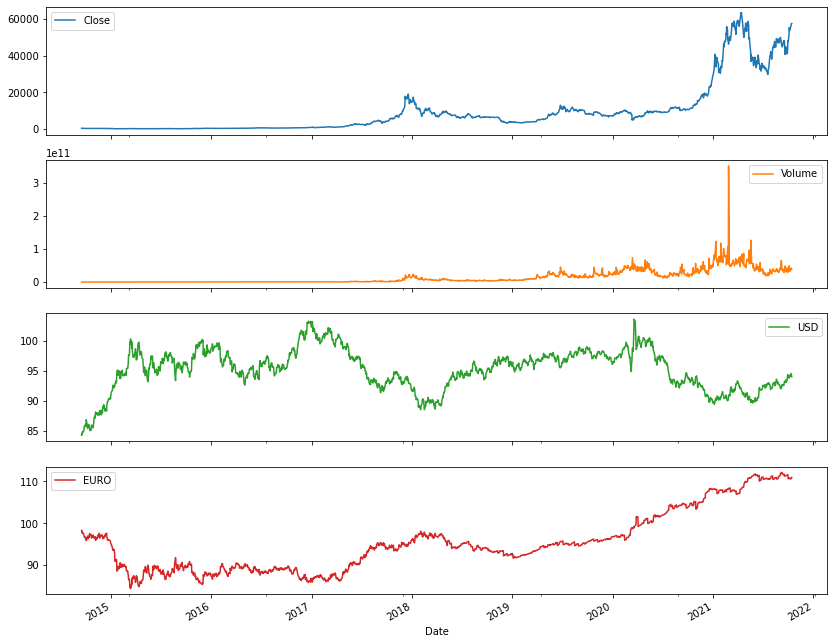

In [29]:
final = final.dropna()
final.plot(subplots=True, figsize=(14,12))

- By comparing the prices of bitcoin and usd and euro visually, we can see a peak in bitcoin around 2017-2018 and a decline in the usd around the same time and a slight rise in the euro. There is a similar pattern toward the end of 2020 going into 2021. We are going to investigate this further.

## Autocorrelation and Partial Autocorrelation

The coefficient of correlation between two values in a time series is called the autocorrelation function (ACF) For example the ACF for a time series is given by:

$$\begin{equation*} \mbox{Corr}(y_{t},y_{t-k}). \end{equation*}$$

This value of k is the time gap being considered and is called the lag. A lag 1 autocorrelation (i.e., k = 1 in the above) is the correlation between values that are one time period apart. More generally, a lag k autocorrelation is the correlation between values that are k time periods apart.

The ACF is a way to measure the linear relationship between an observation at time t and the observations at previous times. If we assume an AR(k) model, then we may wish to only measure the association between and and filter out the linear influence of the random variables that lie in between (i.e., ), which requires a transformation on the time series. Then by calculating the correlation of the transformed time series we obtain the partial autocorrelation function (PACF).

The PACF is most useful for identifying the order of an autoregressive model. Specifically, sample partial autocorrelations that are significantly different from 0 indicate lagged terms that are useful predictors. To help differentiate between ACF and PACF, think of them as analogues to and partial values as discussed previously.

Graphical approaches to assessing the lag of an autoregressive model include looking at the ACF and PACF values versus the lag. In a plot of ACF versus the lag, if you see large ACF values and a non-random pattern, then likely the values are serially correlated. In a plot of PACF versus the lag, the pattern will usually appear random, but large PACF values at a given lag indicate this value as a possible choice for the order of an autoregressive model. It is important that the choice of the order makes sense. For example, suppose you have blood pressure readings for every day over the past two years. You may find that an AR(1) or AR(2) model is appropriate for modeling blood pressure. However, the PACF may indicate a large partial autocorrelation value at a lag of 17, but such a large order for an autoregressive model likely does not make much sense.

The source for this code can be found here [Here](https://www.youtube.com/watch?v=_vQ0W_qXMxk&t=1157s 'Follow Link')

In [30]:
def plotcharts(y, title, lags=None, figsize=(12,8)):
    fig = plt.figure(figsize=figsize)
    layout = (2,2)
    ts_ax = plt.subplot2grid(layout, (0,0))
    hist_ax = plt.subplot2grid(layout, (0,1))
    acf_ax = plt.subplot2grid(layout, (1,0))
    pacf_ax = plt.subplot2grid(layout, (1,1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title, fontsize=14, fontweight="bold")
    y.plot(ax=hist_ax, kind="hist", bins=25)
    hist_ax.set_title("Histogram")
    smt.graphics.tsa.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.tsa.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax

In [31]:
series = final

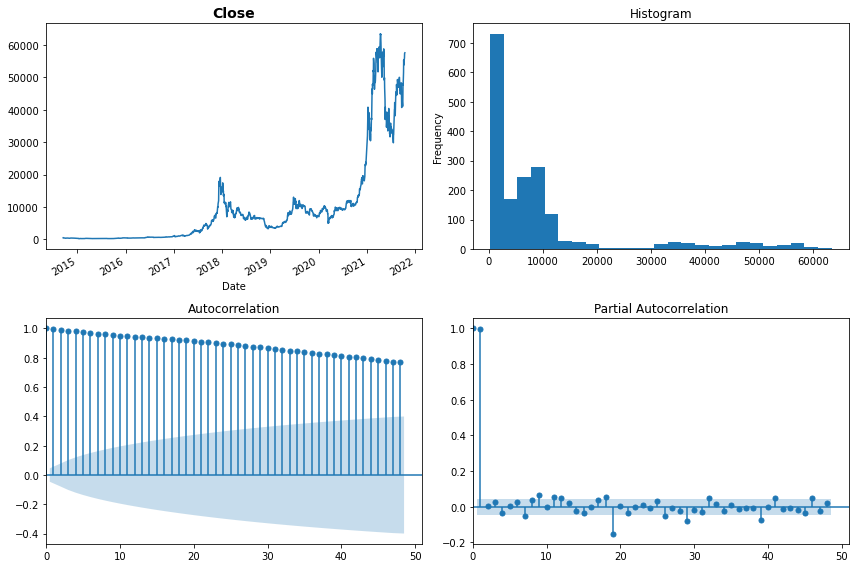

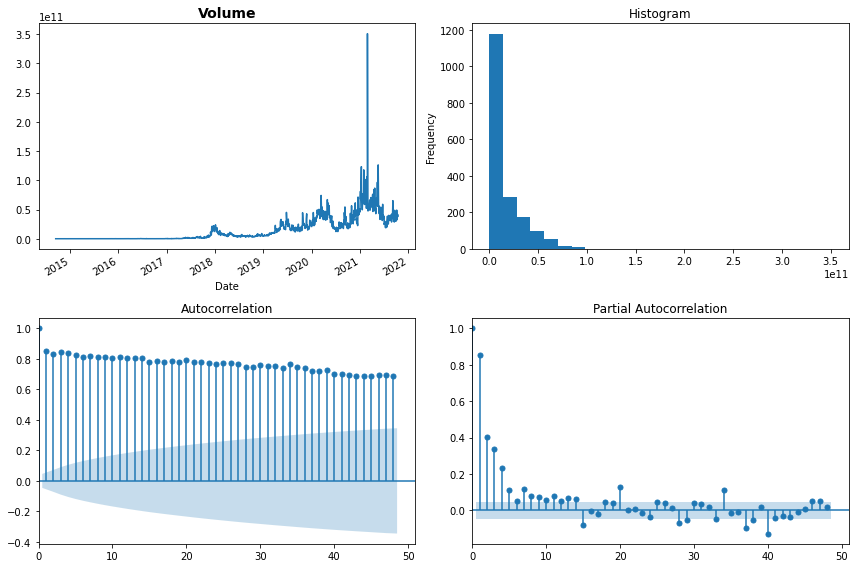

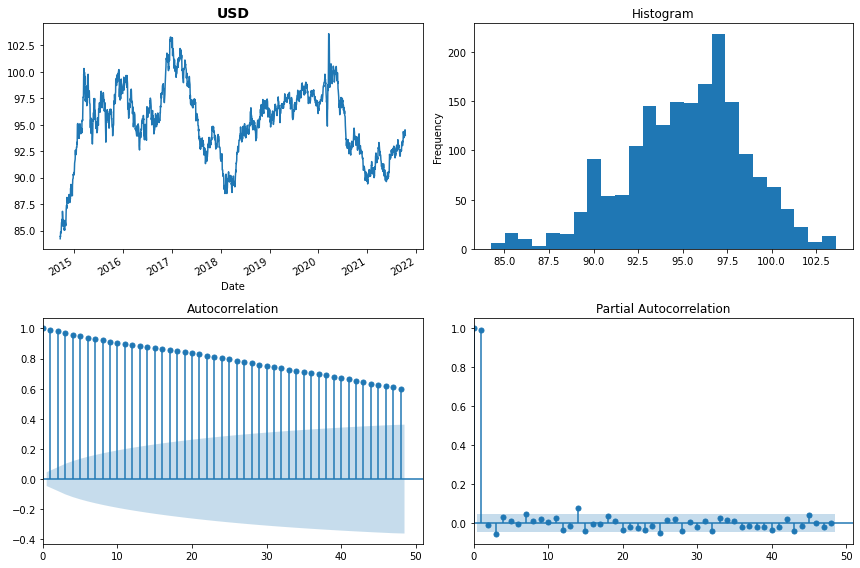

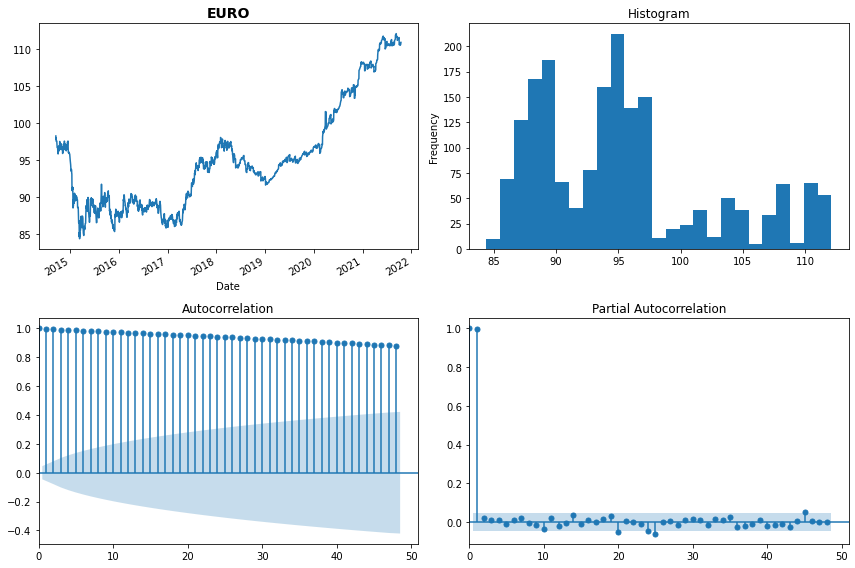

In [32]:
num_var = len(series.iloc[1,:])
for i in range(0, num_var):
    plotcharts(series.iloc[:,i].dropna(), title=series.columns[i], lags=48)

Here we plot four essential graphs that provide us insight into the closing price of bitcoin, usd and euro over this series of time. The bottom two graphs are the graphs that allow you to look at the dependency structure. They're called the autocorrelation and partial autocorrection function graphs. Each bar on in the autocorrelation function graph captures the series itself and how it is correlated with it's own past. These sort of graphs are very useful for identifying the order of our model.

## Stationary Condition

**The four components of Times Series date are:**

1. **Trend**
2. **Seasonality**
3. **Cyclically**
4. **Irregularity, sometimes referred to as the random component**

**Trend**
* Trend is the increase or decrease in the series over a period of time, it persists over a long period of time.
* Example: Population growth over the years can be seen as an upward trend.

**Seasonality**
* Regular pattern of up and down fluctuations.
* It is a short-term variation occurring due to seasonal factors
* Example: Ice-cream sales increase during summer time

**Cyclically**
* It is a medium-term variation caused by circumstances, which repeat in irregular intervals.
* Example: 5 years of economic growth, followed by 2 years of recession, followed by 7 years of economic growth followed by 1 year of recession

**Irregularity**
* It refers to variations which occur due to unpredictable factors and also do not repeat in particular patterns.
* Example: Variations caused by incidents like earthquake, floods, war, etc.

**If the dataset presents all four time series components then the data is non-stationary, which means that typically these components will be present. If the data is not stationary then the time series forecasting will effective. Applying it on a dataset with each component present will not really perform well.**

**So how do we differentiate between these time series.**

**Time Series Stationarity depends on:**

1. **Mean**
2. **Variance**
3. **Co-variance**

## Normalization


Normalized data within statistics, often involves eliminating units of measurement from a dataset. As a result, this enables us to easily compare data with different scales and are measured from different sources.

Why is Normalized Data Important? When training a machine learning model, we aim to bring the data to a common scale and so the various features are less sensitive to each other. In this case, we can utilize data normalization as a method of transforming our data, which may be of different units or scales (bitcoin, usd and euro). This allows our model to train using features that could lead to more accurate predictions.

## Transformation


Applying differencing or seasonal differencing log of the series should make the series stationary.

Simply put, stationarity removes trends from the dataset which can be extremely intrusive to our models. Basically, stationarity improves our models performance and predictive capability.

Close    Volume       USD      EURO
0     0.448201  0.524709  0.388304  0.671297
1     0.549193  0.567939  0.553813  0.450619
2     0.473460  0.623452  0.362545  0.653153
3     0.356840  0.494784  0.435737  0.544281
4     0.447430  0.627242  0.547072  0.505570
...        ...       ...       ...       ...
1818  0.476272  0.623587  0.386633  0.578990
1819  0.460788  0.585332  0.435731  0.506537
1820  0.446973  0.634994  0.524650  0.614512
1821  0.450510  0.552709  0.442518  0.559767
1822  0.426257  0.573196  0.318483  0.595229

[1823 rows x 4 columns]

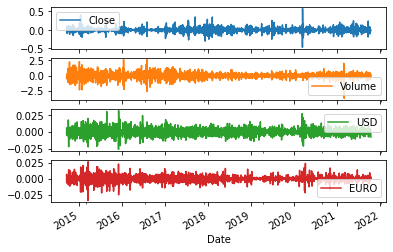

In [34]:
# Log transformation- Converting the data to a logarithmic scale
log = pd.DataFrame(np.log(series))

# Differencing the log values
#1 Difference
log_diff = log.diff().dropna()
#2 Difference
log_diff = log_diff.diff().dropna()
log_diff.plot(subplots=True)

# Normalization MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Creating minmaxscaler object
norm = MinMaxScaler()

# Applying norm to dataframe
final_norm = pd.DataFrame(norm.fit_transform(log_diff), columns=log_diff.columns)
final_norm

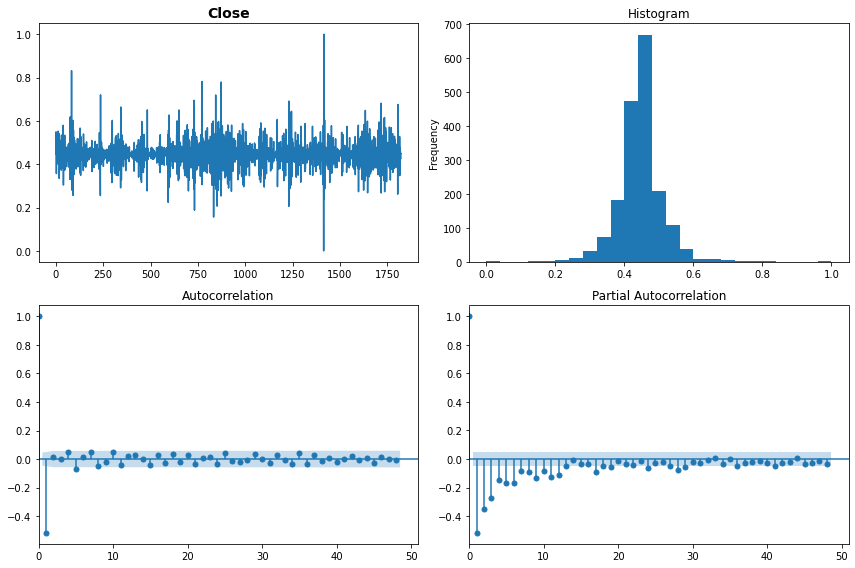

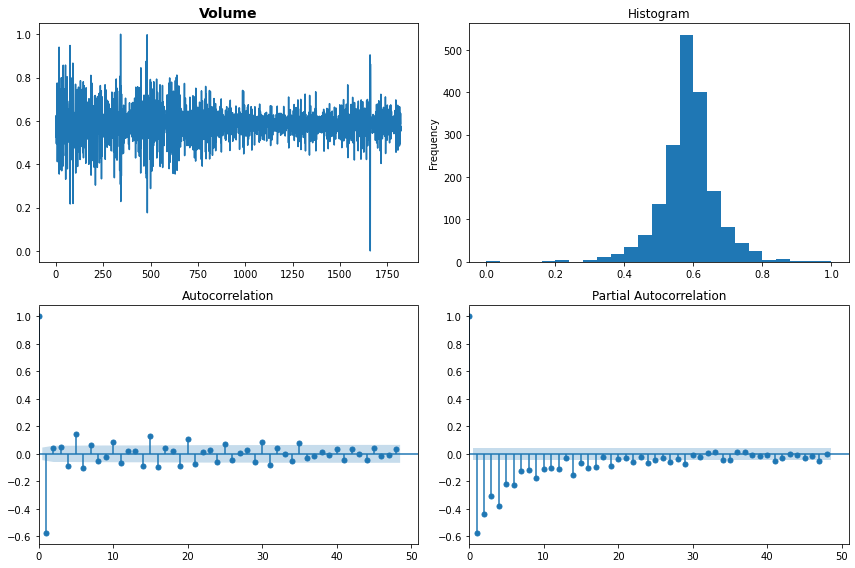

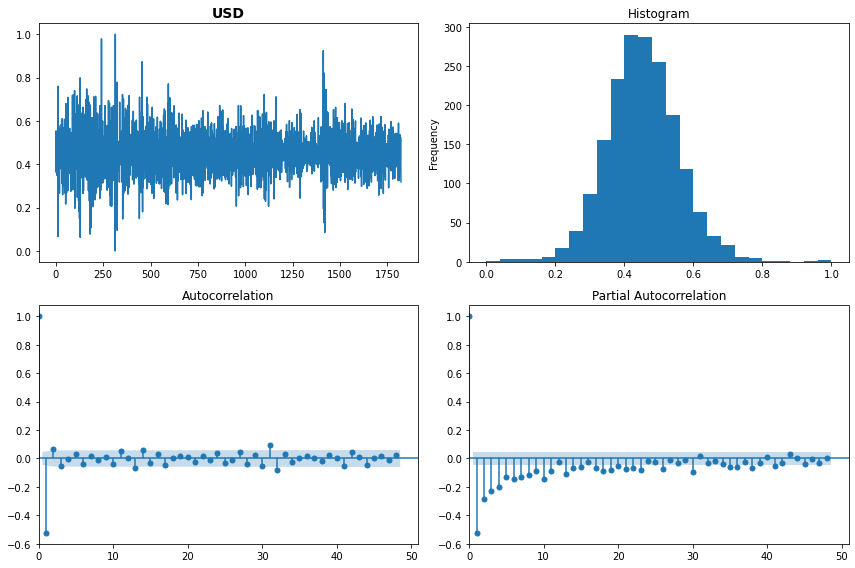

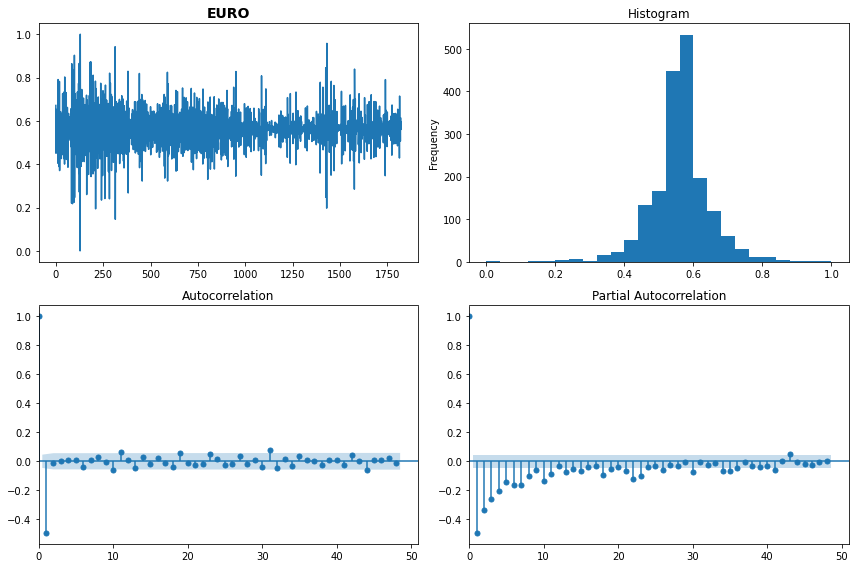

In [35]:
num_var = len(final_norm.iloc[1,:])
for i in range(0, num_var):
    plotcharts(final_norm.iloc[:,i].dropna(), title=final_norm.columns[i], lags=48)

**Next, we are run ADF(Augmented Dickey Fuller) test to determine how well the times series was transformed into stationary. This is a test that outputs certain statistical patterns that we can use to judge whether each parameter is stationary.**

In [36]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag= "AIC")
    print("1. ADF : ", dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num of Observations Used For ADF Regression and Critical Values Calculation : ", dftest[3])
    print("5. Critical Values : ")
    for key, val in dftest[4].items():
        print("\t", key, ": ", val)
        
ad_test(log_diff["Close"])
print("--------------------------------------------")
ad_test(log_diff["Volume"])
print("--------------------------------------------")
ad_test(log_diff["USD"])
print("--------------------------------------------")
ad_test(log_diff["EURO"])


1. ADF :  -14.428492051323923
2. P-Value :  7.700501562991403e-27
3. Num Of Lags :  23
4. Num of Observations Used For ADF Regression and Critical Values Calculation :  1799
5. Critical Values : 
	 1% :  -3.433990164137254
	 5% :  -2.8631479299063405
	 10% :  -2.567626009684832
--------------------------------------------
1. ADF :  -16.204869212205846
2. P-Value :  4.0419842697384053e-29
3. Num Of Lags :  25
4. Num of Observations Used For ADF Regression and Critical Values Calculation :  1797
5. Critical Values : 
	 1% :  -3.4339942213257535
	 5% :  -2.8631497209507284
	 10% :  -2.567626963361616
--------------------------------------------
1. ADF :  -15.747752227794356
2. P-Value :  1.233838919584753e-28
3. Num Of Lags :  25
4. Num of Observations Used For ADF Regression and Critical Values Calculation :  1797
5. Critical Values : 
	 1% :  -3.4339942213257535
	 5% :  -2.8631497209507284
	 10% :  -2.567626963361616
--------------------------------------------
1. ADF :  -15.93535399847

**Our data should be ready to be feed into our models.**

## Models

**We will be evaluating three methods for forecasting time series data.**

1. **Vector Autoregressive (VAR) Model**
2. **XGBoost Model**
3. **Facebook Prophet**

**Train-test Set Split**

We now have to split the sample into training and validation sets. In time series we have to be careful with this because we cannot simply randomly select a training and testing set, because of the time dependence.

In practice you may need to estimate through a moving window or you train your model using some of the history and then you keep moving forward in order to test your model.

Our dataset are given within daily intervals and so we can predict up to a particular number of days.

## Vector Autoregressive (AR) Model

[Source](https://online.stat.psu.edu/stat510/lesson/11/11.2 "Follow Link")

VAR models (vector autoregressive models) are used for multivariate time series. The structure is that each variable is a linear function of past lags of itself and past lags of the other variables.

As an example suppose that we measure three different time series variables, denoted by x{t,1} and x{t,2}.

The vector autoregressive model of order 1, denoted as VAR(1), is as follows:

$$\begin{equation*}
x_{t,1} = \alpha_{1} + \phi_{11} x_{t−1,1} + \phi_{12}x_{t−1,2} + \phi_{13}x_{t−1,3} + w_{t,1}
\end{equation*}$$$$\begin{equation*}
x_{t,2} = \alpha_{2} + \phi_{21} x_{t−1,1} + \phi_{22}x_{t−1,2} + \phi_{23}x_{t−1,3} + w_{t,2}
\end{equation*}$$
Each variable is a linear function of the lag 1 values for all variables in the set.

In a VAR(2) model, the lag 2 values for all variables are added to the right sides of the equations, In the case of three x-variables (or time series) there would be six predictors on the right side of each equation, three lag 1 terms and three lag 2 terms.

In general, for a VAR(p) model, the first p lags of each variable in the system would be used as regression predictors for each variable.

VAR models are a specific case of more general VARMA models. VARMA models for multivariate time series include the VAR structure above along with moving average terms for each variable. More generally yet, these are special cases of ARMAX models that allow for the addition of other predictors that are outside the multivariate set of principal interest.

In [37]:
# Splitting the dataset into train & test subsets
n_obs = 7
train, test = log_diff[:-n_obs], log_diff[-n_obs:]
log_diff.head()

Close    Volume       USD      EURO
Date                                              
2014-09-18  0.002242 -0.398250 -0.003686  0.006631
2014-09-19  0.107513 -0.123245  0.005802 -0.006848
2014-09-22  0.028571  0.229893 -0.005163  0.005523
2014-09-23 -0.092988 -0.588613 -0.000967 -0.001127
2014-09-24  0.001438  0.254001  0.005416 -0.003491

In [38]:
# Fitting the VAR model
from statsmodels.tsa.api import VAR

model = VAR(log_diff)
results = model.fit(maxlags = 25, ic = 'aic')
results.summary()

C:\Users\ronald\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 19, Oct, 2021
Time:                     23:23:32
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -29.8898
Nobs:                     1799.00    HQIC:                  -30.6374
Log likelihood:           18129.2    FPE:                3.19532e-14
AIC:                     -31.0749    Det(Omega_mle):     2.58991e-14
--------------------------------------------------------------------
Results for equation Close
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.000094         0.001104            0.085           0.932
L1.Close          -0.996577         0.024238          -41.116           0.000
L1.Volume          0.007133         0.003976            1.794           

After fitting the model, we see the results of the model. It provides the coefficient and other stats.

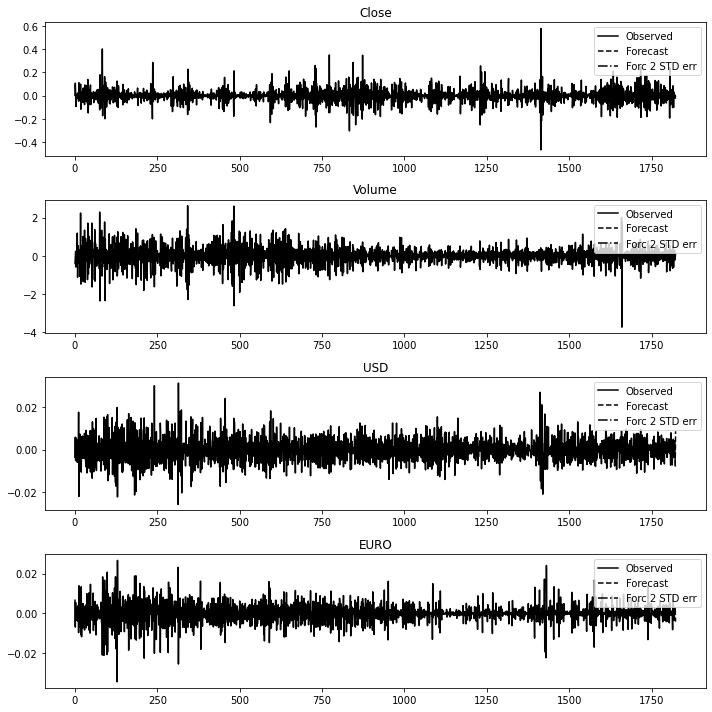

In [39]:
# Forecasting
lag_order = results.k_ar
predicted = results.forecast(log_diff.values[-lag_order:],n_obs)
forecast = pd.DataFrame(predicted, index = log_diff.index[-n_obs:], columns = log_diff.columns)


# Plotting forecasted values
p1 = results.plot_forecast(1)
p1.tight_layout()

In [40]:
# Inverting the Differencing Transformation
def invert_transformation(df, df_forecast, second_diff):
    for col in df.columns:
        # Undo the 2nd Differencing
        if second_diff:
            df_forecast[str(col)] = (df[col].iloc[-1] - df[col].iloc[-2]) + df_forecast[str(col)].cumsum()
        # Undo the 1st Differencing
        df_forecast[str(col)] = df[col].iloc[-1] + df_forecast[str(col)].cumsum()

    return df_forecast

forecast_values = invert_transformation(train, forecast, second_diff=True)
forecast_values

Close    Volume       USD      EURO
Date                                              
2021-10-05  0.271329  1.790983  0.007859  0.022601
2021-10-06  0.461453  2.883736  0.014463  0.036679
2021-10-07  0.668155  4.288508  0.019899  0.052286
2021-10-08  0.872558  5.510949  0.027047  0.066588
2021-10-11  1.052836  6.641424  0.034736  0.079385
2021-10-12  1.243243  7.930294  0.041408  0.093325
2021-10-14  1.458722  9.205966  0.047440  0.108090

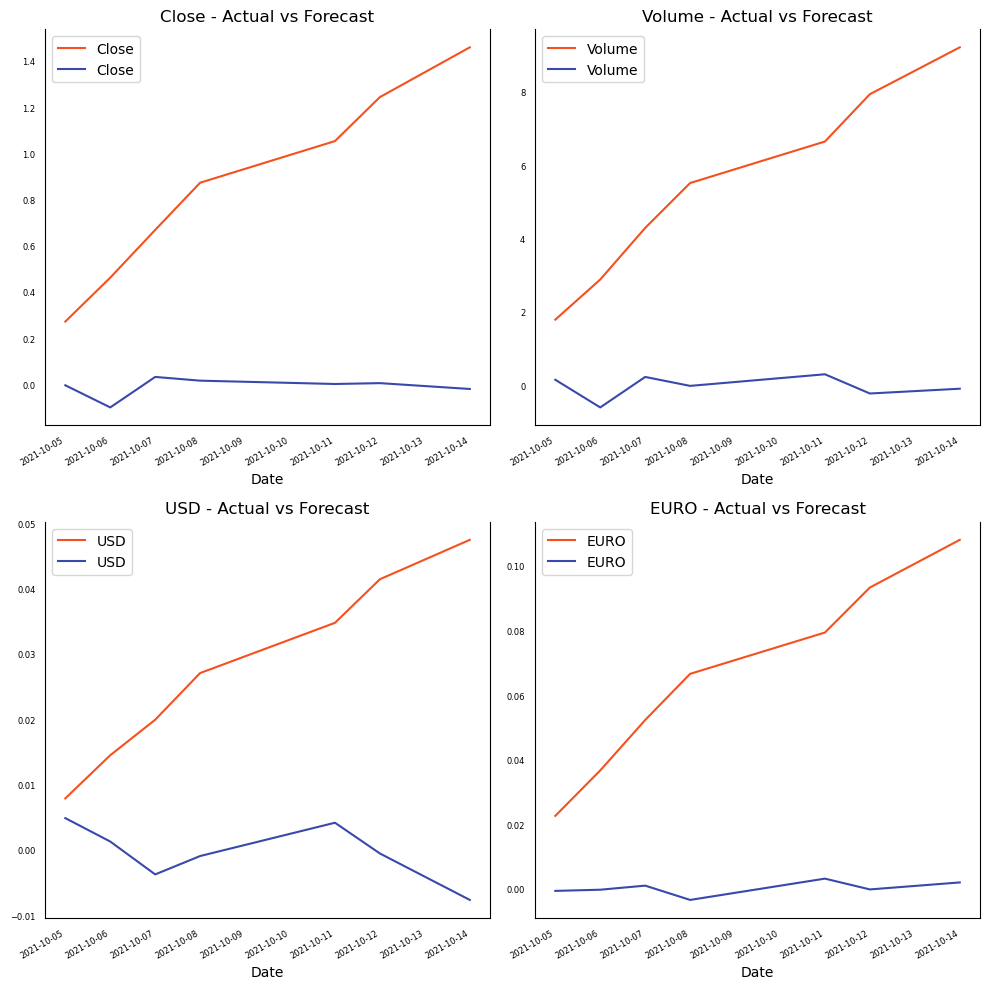

In [41]:
# Actual vs Forecasted Plots
fig, axes = plt.subplots(nrows = int(len(log_diff.columns)/2), ncols = 2, dpi = 100, figsize = (10,10))

for i, (col,ax) in enumerate(zip(log_diff.columns, axes.flatten())):
    forecast_values[col].plot(color = '#F4511E', legend = True, ax = ax).autoscale(axis =' x',tight = True)
    test[col].plot(color = '#3949AB', legend = True, ax = ax)

    ax.set_title(col + ' - Actual vs Forecast')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize = 6)

plt.tight_layout()
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error
from numpy import asarray as arr
mse = mean_squared_error(test, forecast_values)
print("\nMean Squared Error: ", mse)


Mean Squared Error:  9.32866973903287


## XGBoost

[What is XGBoost & How it operates!](https://www.datacamp.com/community/tutorials/xgboost-in-python#what "Follow Link")

Usually, ARIMA regressions are used in classical statistical approaches, when the goal is not just predicting, but also understanding on how different explanatory variables relate with the dependent variable and with each other. ARIMA are thought specifically for time series data.

On the contrary, XGBoost models are used in pure Machine Learning approaches, where we exclusively care about the quality of prediction. XGBoost regressors can be used for time series forecast, even though they are not specifically meant for long term forecasts. But they can work.

In [ ]:
pip install xgboost

In [43]:
#importing xgboost and train_test_split
import xgboost as xgb
from sklearn.model_selection import train_test_split

#displaying dataset
log_diff.head()

Close    Volume       USD      EURO
Date                                              
2014-09-18  0.002242 -0.398250 -0.003686  0.006631
2014-09-19  0.107513 -0.123245  0.005802 -0.006848
2014-09-22  0.028571  0.229893 -0.005163  0.005523
2014-09-23 -0.092988 -0.588613 -0.000967 -0.001127
2014-09-24  0.001438  0.254001  0.005416 -0.003491

In [44]:
# Splitting the dataset into train & test subsets
# X contains the list of attributes
# Y contains the list of labels
X, y = log_diff.iloc[:,:-1], log_diff.iloc[:,-1]

data_dmatrix = xgb.DMatrix(data=X,label=y)
# Convert the dataset into an optimized data structure called DMatrix 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [45]:
# XGBoost's hyperparameters
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 200)

In [46]:
# Fit the regressor 
xg_reg.fit(X_train,y_train)

y_hat = xg_reg.predict(X_test)

[23:23:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [47]:
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
print("RMSE: %f" % (rmse))

RMSE: 0.008524


In [48]:
data_dmatrix

## k-fold Cross Validation using XGBoost

To build more robust models, it is common to do a k-fold cross validation where all the entries in the original training dataset are used for both training as well as validation

In [49]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1, 'max_depth': 2, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3, num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=0)

[23:23:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[23:23:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[23:23:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [50]:
# cv_results contains train and test RMSE metrics for each boosting round.
cv_results.head()

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0         0.450889        0.000102        0.450889       0.000238
1         0.406666        0.000091        0.406666       0.000249
2         0.366862        0.000082        0.366861       0.000258
3         0.331035        0.000073        0.331035       0.000266
4         0.298789        0.000066        0.298789       0.000274

In [51]:
print((cv_results["test-rmse-mean"]).tail())

45    0.013145
46    0.012788
47    0.012467
48    0.012181
49    0.011924
Name: test-rmse-mean, dtype: float64


I get an RMSE for the price prediction aroound $ 10.02 per 1M

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

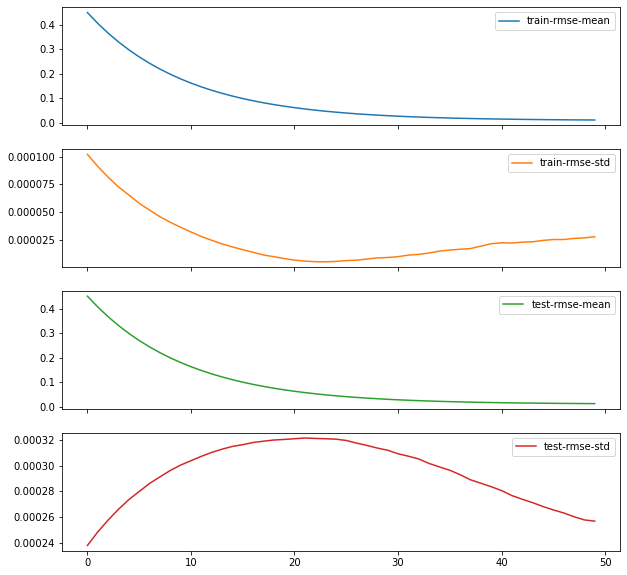

In [52]:
cv_results.plot(subplots=True, figsize=(10,10))

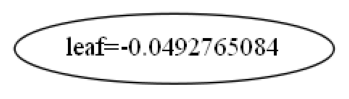

In [53]:
xgb.plot_tree(xg_reg, num_trees=0)
plt.rcParams['figure.figsize'] = [8, 8]
plt.show()

In [54]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(xg_reg, {'max_depth': [2,4,6],'n_estimators': [50, 100, 200]}, verbose=1, n_jobs=-1)
clf.fit(X_train, y_train)

print(clf.best_score_)
print(clf.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[23:24:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
-2.7088955917768063
{'max_depth': 2, 'n_estimators': 200}


## FB Prophet

In [ ]:
pip install --upgrade plotly

Prophet is open source software released by Facebook’s Core Data Science team

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality

It works best with time series that have strong seasonal effects and several seasons of historical data.

Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Read more [Here](https://facebook.github.io/prophet/ "Follow Link")

In [55]:
#importing prophet and fitting model
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly

In [56]:
#functions to automate prophet charts for each series
def fit_model(df):
    m = Prophet(daily_seasonality=True)
    m.fit(df)
    future = m.make_future_dataframe(periods=365)
    forecast = m.predict(future)
    return m, forecast, future

def fb_plots(m, fore):
    return plot_plotly(m, forecast)

def fb_subplots(m, fore):
    return m.plot(forecast), m.plot_components(forecast)

## Bitcoin Closing Price Forecast

In [57]:
bc = pd.read_csv("BTC_USD.csv")
bc_price = bc.drop(bc.columns[[1,2,3,5,6]], axis=1)
bc_vol = bc.drop(bc.columns[[1,2,3,4,5]], axis=1)
bc_price.columns = ["ds","y"]
bc_vol.columns = ["ds","y"]
bc_price.head()

ds           y
0  2014-09-16  457.334015
1  2014-09-17  424.440002
2  2014-09-18  394.795990
3  2014-09-19  408.903992
4  2014-09-20  398.821014

In [58]:
model, forecast, future = fit_model(bc_price)

In [59]:
future.tail()

ds
2934 2022-10-10
2935 2022-10-11
2936 2022-10-12
2937 2022-10-13
2938 2022-10-14

In [60]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
2934 2022-10-10  87363.257455  79530.152647  95176.575910
2935 2022-10-11  87514.385779  79473.963641  96028.590576
2936 2022-10-12  87680.611548  79418.731170  95526.197269
2937 2022-10-13  87859.679199  80180.024671  95966.104533
2938 2022-10-14  87985.326741  79250.194076  95903.765076

In [61]:
fb_plots(model, forecast)

The forecast is expecting the bitcoin price value to continue rise. There has a been a new spike at the end of 2020 that added to this prediction.

(<Figure size 720x432 with 1 Axes>, <Figure size 648x864 with 4 Axes>)

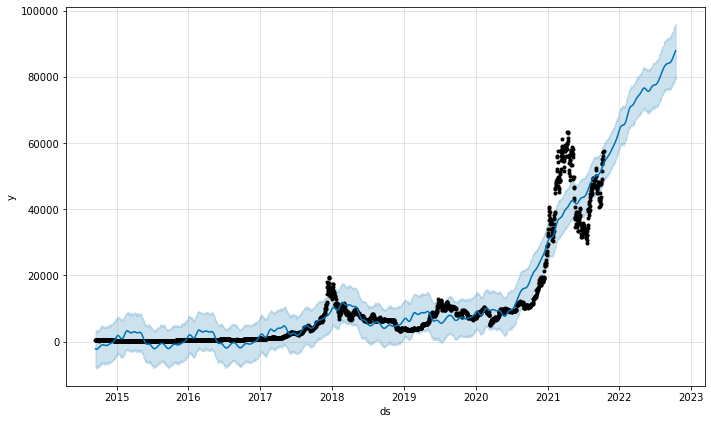

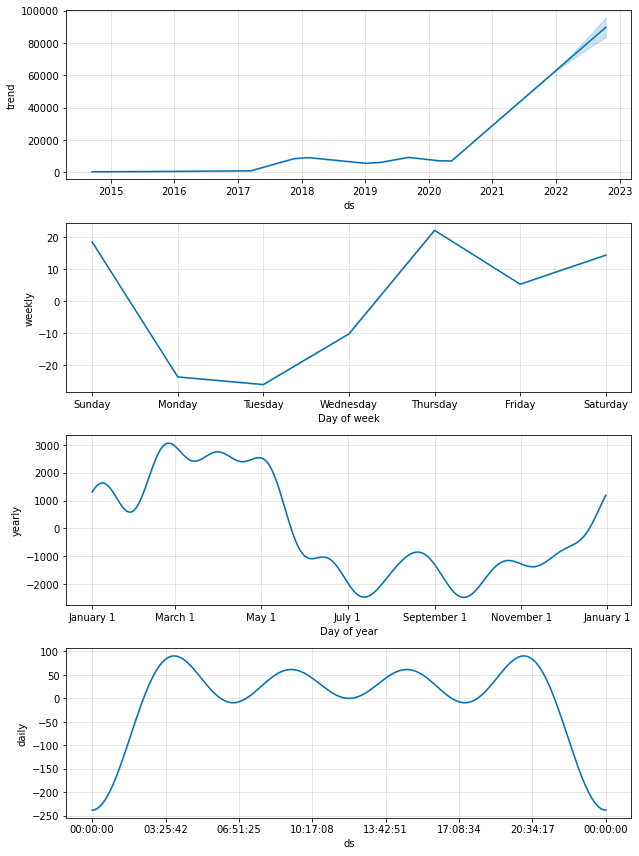

In [63]:
fb_subplots(model, forecast)

## US Price Forecast

In [64]:
usd = pd.read_csv("USD.csv")
usd = usd.drop(usd.columns[[2,3,4,5,6]], axis=1)
usd.columns = ["ds","y"]
usd.head()

ds       y
0  Oct 14, 2021  93.987
1  Oct 13, 2021  94.013
2  Oct 12, 2021  94.519
3  Oct 11, 2021  94.326
4  Oct 08, 2021  94.079

In [65]:
model, forecast, future = fit_model(usd)

In [66]:
future.tail()

ds
2189 2022-10-10
2190 2022-10-11
2191 2022-10-12
2192 2022-10-13
2193 2022-10-14

In [67]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
2189 2022-10-10  86.386497   68.540344  104.199472
2190 2022-10-11  86.350015   68.557286  104.506487
2191 2022-10-12  86.297648   68.531202  104.554807
2192 2022-10-13  86.236405   68.233751  104.162821
2193 2022-10-14  86.199598   68.664613  104.638144

In [68]:
fb_plots(model, forecast)

(<Figure size 720x432 with 1 Axes>, <Figure size 648x864 with 4 Axes>)

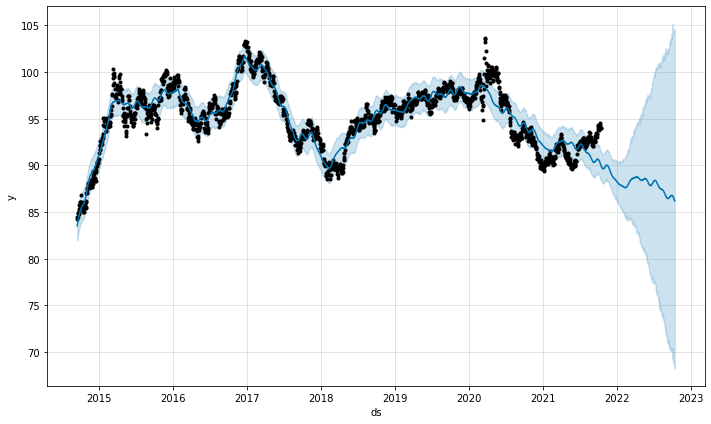

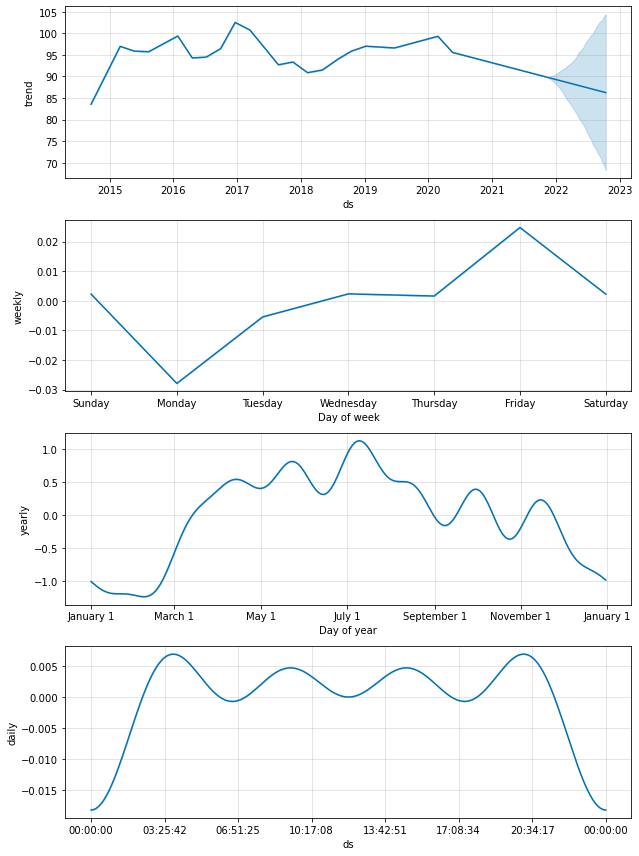

In [69]:
fb_subplots(model, forecast)

The price of the US dollar is exoexcted to continue its fall at least for the near future.

## Euro Price Forecast

In [70]:
eu = pd.read_csv("Euro.csv")
eu = eu.drop(eu.columns[[2,3,4,5,6]], axis=1)
eu.columns = ["ds","y"]
eu.head()

ds       y
0  Oct 14, 2021  110.94
1  Oct 13, 2021  110.58
2  Oct 12, 2021  110.67
3  Oct 11, 2021  110.62
4  Oct 10, 2021  110.57

In [71]:
model, forecast, future = fit_model(eu)

In [72]:
future.tail()

ds
2595 2022-10-10
2596 2022-10-11
2597 2022-10-12
2598 2022-10-13
2599 2022-10-14

In [73]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
2595 2022-10-10  120.490698  102.483149  136.703841
2596 2022-10-11  120.534786  102.172055  136.754156
2597 2022-10-12  120.583057  102.435494  137.078358
2598 2022-10-13  120.623061  102.018365  137.301105
2599 2022-10-14  120.606668  102.195403  137.349125

In [74]:
fb_plots(model, forecast)

(<Figure size 720x432 with 1 Axes>, <Figure size 648x864 with 4 Axes>)

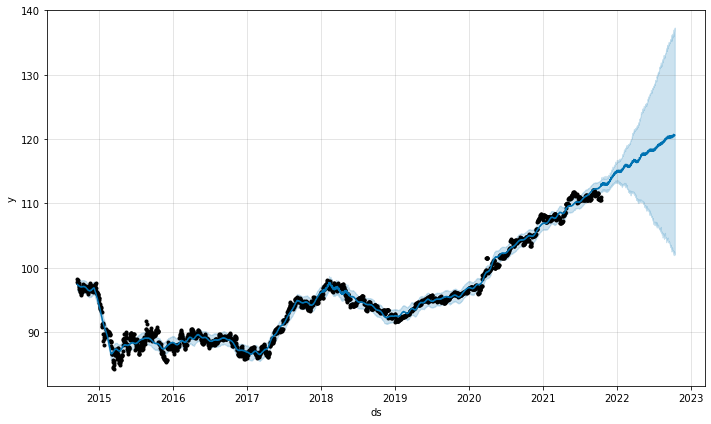

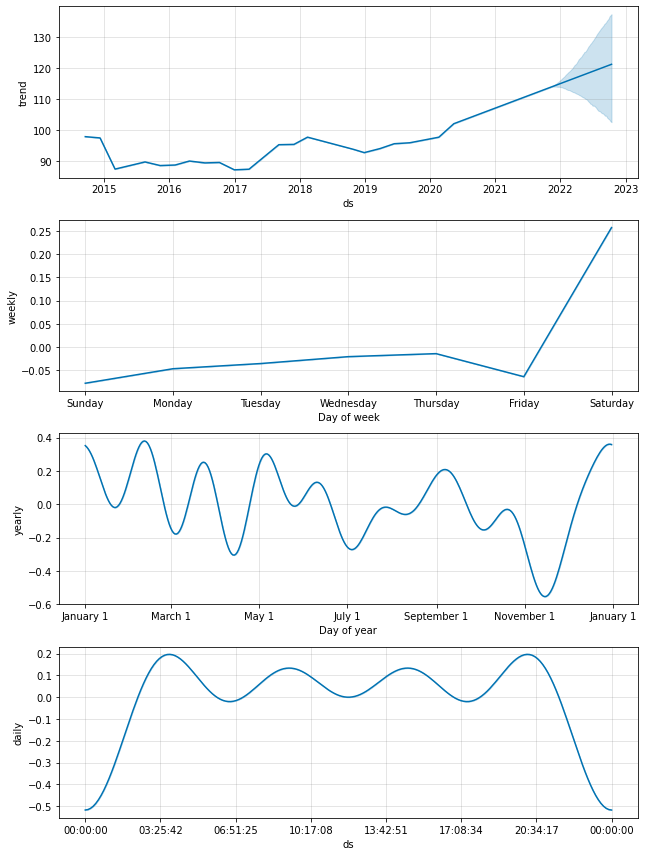

In [75]:
fb_subplots(model, forecast)

The price of the Euro in contrast follows the trajectory of bitcoin, and is expected to continue its steep value rise.

## Bitcoin Volume Forecast

In [76]:
bc_vol.head()

ds           y
0  2014-09-16  457.334015
1  2014-09-17  424.440002
2  2014-09-18  394.795990
3  2014-09-19  408.903992
4  2014-09-20  398.821014

In [77]:
model, forecast, future = fit_model(bc_vol)

In [78]:
future.tail()

ds
2934 2022-10-10
2935 2022-10-11
2936 2022-10-12
2937 2022-10-13
2938 2022-10-14

In [79]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
2934 2022-10-10  87363.257455  79158.771439  95734.209278
2935 2022-10-11  87514.385779  78876.675647  95614.563765
2936 2022-10-12  87680.611548  79826.456755  95340.522290
2937 2022-10-13  87859.679199  79487.225503  96398.745699
2938 2022-10-14  87985.326741  79807.102441  96457.523482

In [80]:
fb_plots(model, forecast)

We are easily able o view a forecast for the volume of bitcoin. The forecast is predicting the trend to countine to rise. We can most likely attribute this to the levels of users trading on robinhood or other platforms. There is growing demand and as more individuals buy in the more bitcoin is in cirruculation throughout the economy.

(<Figure size 720x432 with 1 Axes>, <Figure size 648x864 with 4 Axes>)

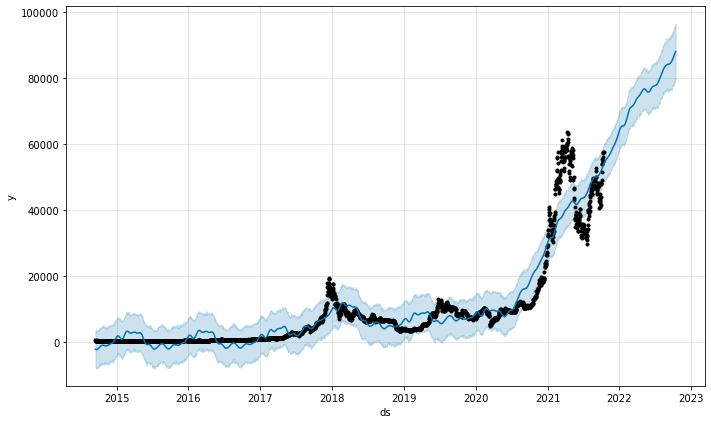

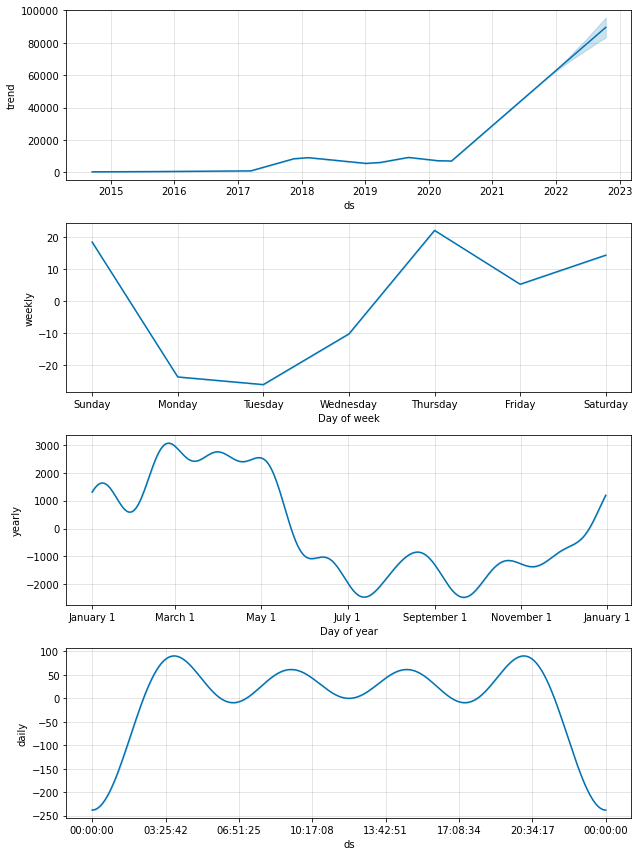

In [81]:
fb_subplots(model, forecast)

Prophet easily allows us to quick view forecasts for an individual series. Here we were able to do so for the Bitcoin closing price, the USD price, and the colume of Bitcoin. These variables are important because, as mentioned in the being analysts are considering the surge in bitcoin due to the ease of individuals being able to trade via robinhood and other apps, as well as a hedge against the US Dollar because of the current state of global affairs.

According to the forecasts for each series, at least for the near future we are going to continue to see bitcoin rise in value as well as the Euro. In contrast the US dollar will continue loosing market share, continuing its downward trend that started with the 2008 financial crisis and without i=obvious sign of recovery at least for the near future

The initial two models (VAR & XGBoost) were able to determine at least one of these insights, but not as easily or quickly as prophet.